<h1>Programming Exercise 1</h1>

In [189]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import spatial

In [190]:
def generateRandom(dimension, number, varience):
  np.set_printoptions(precision=4)
  X = np.random.randn(number, dimension+1)
  X[:,0] = 1
  B = np.random.randn(dimension+1, 1)
  Y = (X.dot(B) + np.random.normal(loc=1, scale=varience))
  return X, B, Y

In [247]:
def linerRegression(X, Y, epoch=10, lr=0.05, threshold=0.00001):
  dimension = np.shape(X[0])[0]
  Bp = np.zeros(shape=(dimension,1))
  costs = [0]
  Blist = []
  for iter in range(epoch):
    h = X.dot(Bp)
    loss = h - Y
    gradient = X.T.dot(loss) / len(Y)
    Bp = Bp - lr*gradient
    Blist.append(cosine(B, Bp))
    cost = cost_function(X, Y, Bp)
    if abs(cost-costs[-1]) < threshold:
      print("Threshold met at epoch: %2d" %(len(costs),))
      break
    costs.append(cost)
  #plot(range(len(Blist)), Blist)            #plot how Similirity between B an Bp increases
  #plot(range(len(costs)), costs)            #plot how Cost function is decreasing
  return Bp, costs

In [282]:
def laso(X, Y, reg, epoch=10, lr=0.05, threshold=0.00001):
  dimension = np.shape(X[0])[0]
  B1 = np.zeros(shape=(dimension,1))
  costs = [0]
  Blist = []
  for iter in range(epoch):
    h = X.dot(B1)
    loss = h - Y
    gradient = X.T.dot(loss) / len(Y)
    B1 = B1 - lr*gradient
    Blist.append(cosine(B, B1))
    cost = cost_function(X, Y, B1) + reg*abs(sum(B1))
    if abs(cost-costs[-1]) < threshold:
      print("L1 Threshold met at epoch: %2d" %(len(costs),))
      break
    costs.append(cost)
    return B1, costs

In [283]:
def ridge(X, Y, reg, epoch=10, lr=0.05, threshold=0):
  dimension = np.shape(X[0])[0]
  B2 = np.zeros(shape=(dimension,1))
  costs = [0]
  Blist = []
  for iter in range(epoch):
    h = X.dot(B2)
    loss = h - Y
    gradient = X.T.dot(loss) / len(Y)
    B2 = B2 - lr*gradient
    Blist.append(cosine(B, B2))
    cost = cost_function(X, Y, B2) + reg*sum(B2**2)
    if abs(cost-costs[-1]) < threshold:
      print("L2 Threshold met at epoch: %2d" %(len(costs),))
      break
    costs.append(cost)
    return B2, costs

In [284]:
X, B, Y = generateRandom(10, 200, 2)
B1, cost1 = laso(X, Y, 0.01, epoch = 10, lr = 0.5)
print("similarity between B(generated) & B(from LR function) i: %2f" %(cosine(B, B1),))

similarity between B(generated) & B(from LR function) i: 0.963381


In [285]:
#X, B, Y = generateRandom(10, 20, 2)
B2, cost1 = ridge(X, Y, 0.2, epoch = 10, lr = 0.05)
print("similarity between B(generated) & B(from LR function) i: %2f" %(cosine(B, B2),))

similarity between B(generated) & B(from LR function) i: 0.963381


In [251]:
#X, B, Y = generateRandom(10, 20, 2)
B2, cost1 = linearRegression(X, Y, epoch = 10, lr = 0.5)
print("similarity between B(generated) & B(from LR function) i: %2f" %(cosine(B, B2),))

similarity between B(generated) & B(from LR function) i: 0.537522


In [215]:
def cost_function(X, Y, B):
  m = len(Y)
  J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
  return J

In [197]:
def cost_function_l1(X, Y, B,reg):
  J = cost_function(X,Y,B) + reg*abs(sum(B))
  return J

In [198]:
def cost_function_l2(X, Y, B, reg):
  J = cost_function(X,Y,B) + reg*sum(B**2)
  return J

In [199]:
def cosine(B, Bp):
  result = 1 - spatial.distance.cosine(B, Bp)
  return result

In [200]:
def plot(X, Y):
  #plt.plot(X, Y)
  plt.scatter(X, Y)
  plt.show()

In [201]:
X, B, Y = generateRandom(10, 100, 0)
Bp, cost = linerRegression(X, Y, epoch = 10000, lr = 0.001, threshold=0.0001)
print("similarity between B(generated) & B(from LR function) i: %2f" %(cosine(B, Bp),))
#plot(range(len(cost)), cost)

Threshold met at epoch: 2721
similarity between B(generated) & B(from LR function) i: 0.973193


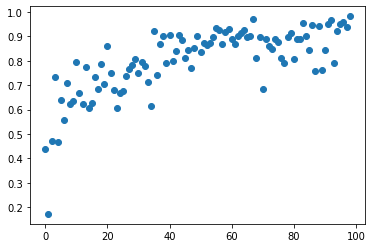

In [202]:
cosineVal = []
for i in range(1, 100):
  X, B, Y = generateRandom(20, i, 1)
  Bp, cost = linerRegression(X, Y, epoch = 100, lr = 0.005, threshold=0)
  cosineVal.append(cosine(B, Bp))

plot(range(len(cosineVal)), cosineVal)

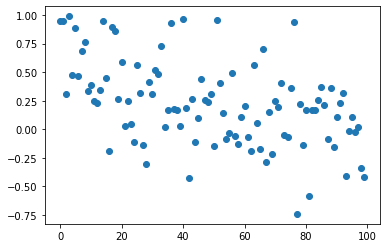

In [203]:
cosineVal = []
for i in range(0, 100):
  X, B, Y = generateRandom(10, 1000, i)
  Bp, cost = linerRegression(X, Y, epoch = 100, lr = 0.005, threshold=0)
  cosineVal.append(cosine(B, Bp))

plot(range(len(cosineVal)), cosineVal)

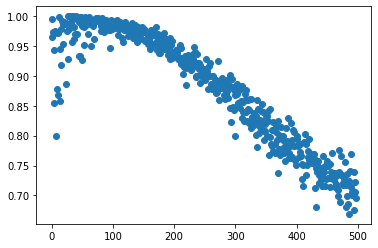

In [204]:
cosineVal = []
for i in range(2, 500):
  X, B, Y = generateRandom(i, 250, 1)
  Bp, cost = linerRegression(X, Y, epoch = 100, lr = 0.05, threshold=0)
  cosineVal.append(cosine(B, Bp))

plot(range(len(cosineVal)), cosineVal)

In [205]:
B1, cost1 = LinerRegression.ridge(X, Y, epoch = 10, lr = 0.5, reg=10000)
B1

array([[ 2.9574e+01],
       [ 1.6950e+00],
       [ 3.7251e+01],
       [-3.2623e+01],
       [ 1.3366e+00],
       [ 2.4817e+01],
       [ 1.8387e+01],
       [-9.4913e+00],
       [ 1.8276e+01],
       [ 2.7376e+01],
       [ 3.7218e+01],
       [ 2.0223e+01],
       [-1.0516e+01],
       [ 1.4143e+00],
       [ 5.4590e+00],
       [-4.5427e+00],
       [-1.8448e+01],
       [-1.8984e+01],
       [-4.2200e+01],
       [-4.7830e+00],
       [-5.5698e+00],
       [ 1.1296e+01],
       [-6.7566e+00],
       [ 5.3938e+00],
       [ 1.9545e+01],
       [ 1.7219e+01],
       [ 4.9102e+00],
       [-5.7791e+01],
       [ 3.9576e+01],
       [-6.2260e+00],
       [-8.7879e+00],
       [-1.8423e+01],
       [ 1.5067e+01],
       [-1.1571e+01],
       [-7.8468e-01],
       [-1.5296e+01],
       [ 1.1192e+00],
       [ 6.2942e+00],
       [-2.7910e+00],
       [ 1.3279e+01],
       [-2.1024e+00],
       [ 3.4361e+01],
       [ 7.6796e+00],
       [ 6.7407e+00],
       [-7.2294e+00],
       [ 3

In [206]:
B3

array([[-0.3294],
       [-0.569 ],
       [-0.4779],
       [ 0.246 ],
       [ 0.063 ],
       [ 0.8008],
       [ 0.6386],
       [ 0.2953],
       [-1.2807],
       [-1.6407],
       [ 1.4609]])

In [207]:
B2

array([[-0.3294],
       [-0.569 ],
       [-0.4779],
       [ 0.246 ],
       [ 0.063 ],
       [ 0.8008],
       [ 0.6386],
       [ 0.2953],
       [-1.2807],
       [-1.6407],
       [ 1.4609]])